In [83]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [65]:
def read_params(params_path, left_img_path, right_img_path):
    #=========================================================
    # Stereo 3D reconstruction 
    #=========================================================
    #Load camera parameters
    
    ret = np.load(params_path + '/ret.npy')
    K = np.load(params_path + '/K.npy')
    tvec = np.load(params_path + '/tvecs.npy')
    dist = np.load(params_path + '/dist.npy')
    #Load pictures
    img1 = cv2.imread(left_img_path)
    img2 = cv2.imread(right_img_path)
    return ret, K, tvec, dist, img1, img2

def undistort(img, K, dist):
    h,w = img.shape[:2]
    #Get optimal camera matrix for better undistortion 
    new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(K, dist, (w, h), 1, (w, h))
    #Undistort images
    return cv2.undistort(img, K, dist, None, new_camera_matrix)

def disparity_map(img1, img2, win_size=5, min_disp=-1, max_disp=63, blockSize=5, uniquenessRatio=5, speckleWindowSize=5,
                speckleRange=5, disp12MaxDiff=1):
    #Set disparity parameters
    #Note: disparity range is tuned according to specific parameters obtained through trial and error. 
    num_disp = max_disp - min_disp # Needs to be divisible by 16
    #Create Block matching object. 
    stereo = cv2.StereoSGBM_create(minDisparity= min_disp,
                numDisparities = num_disp,
                blockSize = blockSize,
                uniquenessRatio = uniquenessRatio,
                speckleWindowSize = speckleWindowSize,
                speckleRange = speckleRange,
                disp12MaxDiff = disp12MaxDiff,
                P1 = 8*3*win_size**2,#8*3*win_size**2,
                P2 =32*3*win_size**2) #32*3*win_size**2)
    #Compute disparity map
    disp_map = stereo.compute(img1, img2)
    return disp_map

def point_cloud(depth):
    """Transform a depth image into a point cloud with one point for each
    pixel in the image, using the camera transform for a camera
    centred at cx, cy with field of view fx, fy.

    depth is a 2-D ndarray with shape (rows, cols) containing
    depths from 1 to 254 inclusive. The result is a 3-D array with
    shape (rows, cols, 3). Pixels with invalid depth in the input have
    NaN for the z-coordinate in the result.

    """
    rows, cols = depth.shape
    c, r = np.meshgrid(np.arange(cols), np.arange(rows), sparse=True)
    valid = (depth > 0) & (depth < 255)
    z = np.where(valid, depth / 256.0, np.nan)
    x = np.where(valid, z * (c - self.cx) / self.fx, 0)
    y = np.where(valid, z * (r - self.cy) / self.fy, 0)
    return np.dstack((x, y, z))

In [66]:
ret, K, tvec, dist, img1, img2 = read_params('./camera_calibration/camera_params',
                                       './camera_calibration/recon3d_demo/imgs/left.jpg',
                                       './camera_calibration/recon3d_demo/imgs/right.jpg')
img1 = cv2.GaussianBlur(img1, (5, 5), cv2.BORDER_DEFAULT)
img2 = cv2.GaussianBlur(img2, (5, 5), cv2.BORDER_DEFAULT)
img1_undistort = undistort(img1, K, dist)
img2_undistort = undistort(img2, K, dist)
## Depth image
disp_map = disparity_map(img1_undistort, img2_undistort)

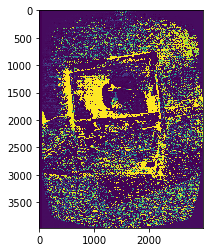

In [67]:
plt.imshow(disp_map)

In [79]:

def point_cloud(depth, K, t):
    """Transform a depth image into a point cloud with one point for each
    pixel in the image, using the camera transform for a camera
    centred at cx, cy with field of view fx, fy.

    depth is a 2-D ndarray with shape (rows, cols) containing
    depths from 1 to 254 inclusive. The result is a 3-D array with
    shape (rows, cols, 3). Pixels with invalid depth in the input have
    NaN for the z-coordinate in the result.

    """
    rows, cols = depth.shape
    c, r = np.meshgrid(np.arange(cols), np.arange(rows), sparse=True)
    valid = (depth > 0) & (depth < 255)
    z = np.where(valid, depth / 256.0, np.nan)
    print((z * (c - t[0])).shape)
#     x = np.where(valid, z * (c - t[0]) / K[0, 0], 0)
    x = np.where(valid, np.product(z, (c - t[0]) / K[0, 0]), 0)
    y = np.where(valid, z * (r - t[1]) / K[1, 1], 0)
    return np.dstack((x, y, z))


In [80]:
pnt_cloud = point_cloud(disp_map, K, tvec)

ValueError: operands could not be broadcast together with shapes (3968,2976) (3,2976) 

In [84]:
import PIL.Image
img = PIL.Image.open('./imgs/100.png')
exif_data = img._getexif()

import PIL.ExifTags
exif = {
    PIL.ExifTags.TAGS[k]: v
    for k, v in img._getexif().items()
    if k in PIL.ExifTags.TAGS
}

AttributeError: 'NoneType' object has no attribute 'items'

In [85]:
exif_data

In [ ]:
x